## Load

In [162]:
import pandas as pd
data = pd.read_csv('dataset.tsv', sep='\t', index_col=0)

In [163]:
data.clean_text = data.clean_text.apply(eval)
data.bow = data.bow.apply(eval)
data.entities = data.entities.apply(eval)

In [164]:
data.index = pd.Index(list(range(len(data))))

## LDA features

In [165]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel, LdaMulticore

In [166]:
corpus = data.bow
dictionary = Dictionary(documents=data.clean_text.values)
print("Found {} words.".format(len(dictionary.values())))

Found 1882 words.


In [ ]:
num_topics = 400
#A multicore approach to decrease training time
LDAmodel = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics,
                        workers=4,
                        chunksize=4000,
                        passes=7,
                        alpha='asymmetric')

In [167]:
import numpy as np

In [168]:
def document_to_lda_features(lda_model, document):
    topic_importances = LDAmodel.get_document_topics(document, minimum_probability=0)
    topic_importances = np.array(topic_importances)
    return topic_importances[:,1]

In [169]:
data['lda_features'] = list(map(lambda doc:
                                      document_to_lda_features(LDAmodel, doc),
                                      data.bow))

In [170]:
X_lda = np.array(list(map(np.array, data.lda_features)))

## Clustering

In [ ]:
K = len(data['intent'].unique())

In [ ]:
X = X_lda
y = data['intent']

In [ ]:
X.shape, y.shape

---

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
km = KMeans(K).fit(X)

In [ ]:
km = AgglomerativeClustering(K).fit(X)

In [ ]:
km = GaussianMixture(K, tol=1e-6, max_iter=500).fit(X)

---

In [ ]:
comp = pd.DataFrame(data[['text', 'intent']])

In [ ]:
comp['clusters'] = km.predict(X)

In [ ]:
comp['clusters'] = km.labels_

In [ ]:
comp['clusters'].hist().get_figure().savefig('w2v/figure.pdf')

In [ ]:
r = pd.pivot_table(comp, index='intent', columns='clusters', aggfunc=len, fill_value=0)\
            .style.background_gradient(axis=1)

In [ ]:
r

In [159]:
from sklearn.metrics import *

In [160]:
def purity_score(y_true, y_pred):
    contingency_matrix = cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

## GO

10 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture
20 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture
30 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture
50 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


100 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


150 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


200 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


300 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


400 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


500 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


550 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


600 features
	 KMeans
	 AgglomerativeClustering
	 GaussianMixture


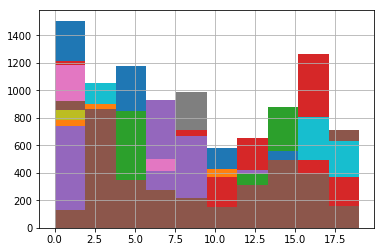

In [171]:
raw_results = []
cms = []
np.random.seed(0)

for num_topics in [10, 20, 30, 50, 100, 150, 200, 300, 400, 500, 550, 600]:
    LDAmodel = LdaMulticore(corpus=corpus,
                            id2word=dictionary,
                            num_topics=num_topics,
                            workers=4,
                            chunksize=4000,
                            passes=7,
                            alpha='asymmetric')
    data['lda_features'] = list(map(lambda doc:
                                      document_to_lda_features(LDAmodel, doc),
                                      data.bow))
    X = np.array(list(map(np.array, data.lda_features)))
    print('%d features'%num_topics)
    for model in [KMeans, AgglomerativeClustering, GaussianMixture]:
        print('\t %s'%str(model).split('.')[-1][:-2])
        try:
            km = model(K, tol=1e-6, max_iter=500).fit(X)
        except:
            km = model(K).fit(X)


        comp = pd.DataFrame(data[['text', 'intent']])
        try:
            comp['clusters'] = km.labels_
        except:
            comp['clusters'] = km.predict(X)

        comp['clusters'].hist().get_figure().savefig('lda/hist_%d.pdf'%num_topics)
        cms += [pd.pivot_table(comp, index='intent', columns='clusters', aggfunc=len, fill_value=0)\
                    .style.background_gradient(axis=1)]
        raw_results += [(
            purity_score(comp['intent'], comp['clusters']),
            silhouette_score(X, comp['clusters']),
            homogeneity_score(comp['intent'], comp['clusters']),
            completeness_score(comp['intent'], comp['clusters']),
            num_topics,
            str(model).split('.')[-1][:-2])
        ]

In [172]:
results = pd.DataFrame(raw_results,
                       columns=['purity', 'silhouette', 'homogeneity', 
                                'completeness', 'features num', 'model'])


In [ ]:
#results['AVG'] = results[results.columns.difference(['model', 'features num'])].apply(np.mean, axis=1)

In [173]:
import seaborn as sns; sns.set()

In [ ]:
results.to_csv('lda/scores.csv')

In [ ]:
results.style.background_gradient(axis=0)

In [175]:
results.groupby('features num').mean()

,purity,silhouette,homogeneity,completeness
features num,,,,
10,0.253656,0.461589,0.157498,0.178928
20,0.259203,0.378276,0.168191,0.182203
30,0.251538,0.331069,0.157755,0.168448
50,0.240545,0.287032,0.147430,0.166824
100,0.266465,0.187596,0.168647,0.189221
150,0.256077,0.167888,0.161589,0.185054
200,0.263843,0.149212,0.175117,0.194913
300,0.250025,0.151526,0.165607,0.184314
400,0.272718,0.192777,0.177547,0.192270


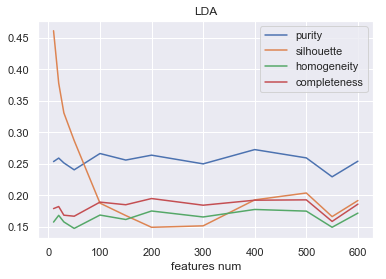

In [176]:
results.groupby('features num').mean().plot(title='LDA').get_figure().savefig('report/lda_scores.png')

In [190]:
results.loc[26]

purity                 0.266566
silhouette            0.0255941
homogeneity            0.184722
completeness           0.194988
features num                400
model           GaussianMixture
Name: 26, dtype: object

In [196]:
cms[25]

## Quick easy classifier

- 10 fold cross validation on 100 examples from labelled data
- Feed forward network
- Input = sequence of word representations

In [110]:
dictionary = Dictionary(documents=data.clean_text.values)
print("Found {} words.".format(len(dictionary.values())))
data['bow'] = list(map(lambda doc: dictionary.doc2bow(doc), data.clean_text))
corpus = data.bow

Found 3621 words.


In [111]:
LDAmodel = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=500,
                        workers=4,
                        chunksize=4000,
                        passes=7,
                        alpha='asymmetric')
data['lda_features'] = list(map(lambda doc:
                                  document_to_lda_features(LDAmodel, doc),
                                  data.bow))

/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [112]:
X = np.array(list(map(np.array, data.lda_features)))
y = data['intent']

In [113]:
from collections import Counter

In [114]:
Counter(y).most_common()[-1]

('risk', 151)

In [33]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

def balanced_sample_maker(X, y, sample_size=None, random_seed=36):
    uniq_levels = np.unique(y)
    uniq_counts = {level: sum(y == level) for level in uniq_levels}

    if not sample_size:
        sample_size = round(min(uniq_counts.values()))
        print(sample_size)
    
    if not random_seed is None:
        np.random.seed(random_seed)

    # find observation index of each class levels
    groupby_levels = {}
    for ii, level in enumerate(uniq_levels):
        obs_idx = [idx for idx, val in enumerate(y) if val == level]
        groupby_levels[level] = obs_idx
    # oversampling on observations of each label
    balanced_copy_idx = []
    for gb_level, gb_idx in groupby_levels.items():
        over_sample_idx = np.random.choice(gb_idx, size=sample_size, replace=False).tolist()
        balanced_copy_idx+=over_sample_idx
    np.random.shuffle(balanced_copy_idx)

    left_idx = [i for i in range(len(X)) if i not in balanced_copy_idx]
    
    data_train=X[balanced_copy_idx]
    labels_train=y[balanced_copy_idx]
    
    data_test=X[left_idx]
    labels_test=y[left_idx]
    
    if  ((len(data_train)) == (sample_size*len(uniq_levels))):
        print('number of sampled example ', sample_size*len(uniq_levels), 'number of sample per class ', sample_size, ' #classes: ', len(list(set(uniq_levels))))
    else:
        print('number of samples is wrong ')

    labels, values = zip(*Counter(labels_train).items())
    print('number of classes ', len(list(set(labels_train))))
    check = all(x == values[0] for x in values)
    print(check)
    if check == True:
        print('Good all classes have the same number of examples')
    else:
        print('Repeat again your sampling your classes are not balanced')
    indexes = np.arange(len(labels))
    width = 0.5
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.show()
    return data_train,labels_train, data_test, labels_test

151
number of sampled example  3020 number of sample per class  151  #classes:  20
number of classes  20
True
Good all classes have the same number of examples


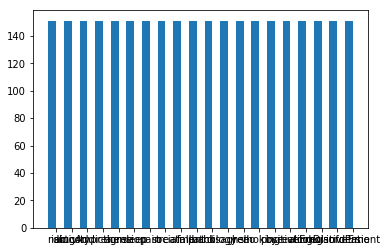

In [115]:
X,y,_,_=balanced_sample_maker(X,y.values)

number of sampled example  2400 number of sample per class  120  #classes:  20
number of classes  20
True
Good all classes have the same number of examples


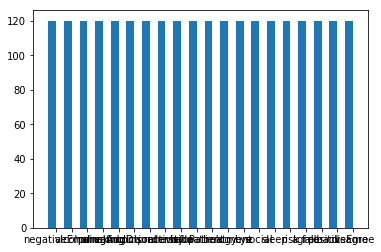

In [116]:
X_train, y_train, _, _ = balanced_sample_maker(X,y, int(151*0.8))

number of sampled example  2400 number of sample per class  120  #classes:  20
number of classes  20
True
Good all classes have the same number of examples


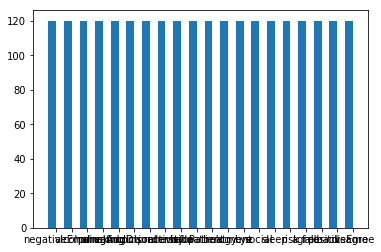

In [146]:
X_train, y_train, X_test, y_test = balanced_sample_maker(X,y, int(151*0.8))

In [36]:
from sklearn.model_selection import cross_validate

In [37]:
from sklearn.svm import SVC

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
clf = RandomForestClassifier().fit(X_train, y_train)

/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [148]:
clf.score(X_test, y_test)

0.29193548387096774

In [117]:
clf = SVC(kernel='linear', C=1, random_state=0, probability=True).fit(X_train, y_train)

In [118]:
clf.score(X_test, y_test)

0.05909090909090909

In [119]:
clf.predict(X_test[:40])

array(['incomprehension', 'agree', 'sleep', 'smoking', 'sleep', 'agree',
       'smoking', 'fallback', 'incomprehension', 'positiveEmo', 'smoking',
       'pain', 'pain', 'agree', 'smoking', 'pathology', 'agree',
       'infoPatient', 'fallback', 'fallback', 'positiveEmo', 'agree',
       'agree', 'pain', 'pain', 'agree', 'social', 'disagree', 'fallback',
       'fallback', 'agree', 'agree', 'pain', 'negativeEmo',
       'eatingDisorders', 'social', 'smoking', 'sleep', 'fallback',
       'eatingDisorders'], dtype=object)

In [149]:
scores = cross_validate(clf, X, y, scoring='accuracy', cv=5,
                             return_estimator=True)

In [150]:
print('{:2.3} + {:2.3}%'.format(np.mean(scores['train_score']), np.std(scores['train_score'])))

0.891 + 0.00343%


/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [151]:
print('{:2.3} + {:2.3}%'.format(np.mean(scores['test_score']), np.std(scores['test_score'])))

0.298 + 0.0129%


In [44]:
from sklearn.model_selection import cross_val_score

In [152]:
cv_scores = cross_val_score(clf, X_test, y_test, cv=5) 

In [153]:
cv_scores

array([0.21428571, 0.15833333, 0.18333333, 0.18333333, 0.225     ])

In [154]:
print('{:2.3} + {:2.3}%'.format(np.mean(cv_scores), np.std(cv_scores)))

0.193 + 0.0239%


In [48]:
from sklearn.metrics import confusion_matrix

In [155]:
clf_res = pd.DataFrame([clf.predict(X_test), y_test]).T
clf_res.columns = ['class', 'intent']

In [144]:
X_lda = np.array(list(map(np.array, data.lda_features)))
data['label'] = clf.predict(X_lda)

In [145]:
data[data.label=='pain'][['intent', 'label', 'text', 'clean_text']]

,intent,label,text,clean_text
111,pathology,pain,I think i may have Anorexia,"[think, may, anorexia]"
205,sleep,pain,"if I were to jog for 10 minutes, then I have insomnia","[jog, _num_, minute, insomnia]"
340,sleep,pain,I slept yesterday night for around 6:30 hours,"[sleep, yesterday, night, around, _num_, hour]"
374,sleep,pain,I feel tired already after 11 a.m,"[feel, tire, already, _num_]"
420,eatingDisorders,pain,After lunch I have about 2 servings of fruit,"[lunch, _num_, serving, fruit]"
440,eatingDisorders,pain,i love to eat too much sweet,"[love, eat, much, sweet]"
601,drugAddiction,pain,Im at Meth currently,"[meth, currently]"
644,drugAddiction,pain,i had a very bad problem with pills,"[bad, problem, pill]"
915,pain,pain,I feel this pain every minute,"[feel, pain, every, minute]"
916,pain,pain,This pain was were since 4 years,"[pain, since, _num_, year]"


In [156]:
cm = pd.DataFrame(confusion_matrix(clf_res['intent'], clf_res['class']), 
             index=clf.classes_, columns=clf.classes_)

In [ ]:
clf_res.groupby('class').count()

In [ ]:
clf_res.groupby('intent').count()

In [157]:
cm.style.set_table_styles(
    [dict(selector="th",props=[('max-width', '120px')]),
        dict(selector="th.col_heading",
                 props=[("writing-mode", "vertical-rl"), 
                        ('transform', 'rotateZ(180deg)'),
                        ])]
).background_gradient(axis=1)

,activity,agree,alcohol,bye,disagree,drugAddiction,eatingDisorders,fallback,hello,incomprehension,infoPatient,negativeEmo,pain,pathology,positiveEmo,risk,sleep,smoking,social,treatment
activity,11,2,1,0,0,3,1,3,1,1,1,1,0,0,0,0,1,0,3,2
agree,0,8,2,2,6,1,1,3,1,1,0,0,1,1,1,0,2,0,0,1
alcohol,2,0,14,0,0,2,0,0,3,0,1,2,0,1,0,5,0,0,1,0
bye,2,1,0,14,1,2,0,4,0,1,2,2,0,0,0,1,0,1,0,0
disagree,1,1,0,3,13,0,1,7,0,0,1,0,0,1,2,0,0,0,1,0
drugAddiction,3,0,3,2,1,1,2,1,2,2,3,0,1,0,2,6,1,1,0,0
eatingDisorders,2,2,1,1,0,4,5,1,0,2,5,1,0,1,1,0,3,2,0,0
fallback,1,4,0,0,4,2,0,6,2,1,2,3,1,3,0,0,0,0,0,2
hello,0,2,0,2,0,1,0,7,9,3,1,2,1,1,1,0,0,1,0,0
incomprehension,3,1,1,1,1,2,2,3,1,5,1,1,1,3,1,0,1,1,1,1


In [ ]:
clf_res.groupby('intent').count().sort_values('class').plot(kind='barh')

In [ ]:
data.groupby('intent').count()['text'].sort_values().plot(kind='barh')

In [ ]:
data.loc[0]

## Label new data

In [52]:
new_data = pd.read_csv('general_health.tsv', sep='\t', index_col=0)

In [53]:
new_data = new_data.drop_duplicates()

In [54]:
new_data.clean_text = new_data.clean_text.apply(eval)

In [55]:
len(new_data)

110200

In [56]:
new_data['bow'] = list(map(lambda doc: dictionary.doc2bow(doc), new_data.clean_text))

In [57]:
new_data['lens']= new_data.bow.apply(len)
new_data = new_data[new_data.lens>0]

In [58]:
len(new_data)

101010

In [59]:
new_data.index = pd.Index(list(range(len(new_data))))

In [60]:
new_data['lda_features'] = list(map(lambda doc:
                                      document_to_lda_features(LDAmodel, doc),
                                      new_data.bow))

In [61]:
new_data.head()

,clean_text,text,bow,lens,lda_features
0,"[dear, sarah_num_, writing, still, problems, k...",Dear Sarah68 : \n\n I am writing to you again ...,"[(497, 1), (1431, 1)]",2,"[0.024727053940296173, 0.004497535992413759, 0..."
1,"[still, inflammation, pain]",I still have inflammation and pain .,"[(497, 1), (537, 1)]",2,"[0.004698671866208315, 0.004497535992413759, 0..."
2,"[homeopathic, remedy, get, rid, inflammation, ...",Is there any homeopathic remedy that will get ...,"[(51, 1), (1559, 1)]",2,"[0.3428365886211395, 0.004497535992413759, 0.0..."
3,"[kind, regards, avva, hi, say, knee, inflammed]","\n\n Kind regards , \n\n\n avva \n Hi , \n\n Y...","[(78, 1), (233, 1), (1291, 1), (1432, 1)]",4,"[0.20301716029644012, 0.0026985215954482555, 0..."
4,"[remedy, would, suggest, apis]",\n\n The remedy that I would suggest for this ...,"[(119, 1), (1559, 1)]",2,"[0.33805060386657715, 0.004497535992413759, 0...."


In [62]:
X_new_lda = np.array(list(map(np.array, new_data.lda_features)))

In [63]:
new_data['prediction'] = clf.predict(X_new_lda)
new_data['proba'] = clf.predict_proba(X_new_lda).max(axis=1)

In [65]:
pd.set_option('max_colwidth', 800)

In [178]:
Counter(sum(data[data.intent == 'sleep'].clean_text.values, [])).most_common(10)

[('sleep', 214),
 ('_num_', 154),
 ('wake', 62),
 ('night', 58),
 ('hour', 48),
 ('go', 40),
 ('feel', 40),
 ('fall', 32),
 ('asleep', 32),
 ('get', 30)]

In [66]:
new_data.sort_values('proba', ascending=False)[['text', 'proba', 'prediction', 'clean_text']]

,text,proba,prediction,clean_text
30793,\n\n Last week I had pain in the area of my left rib .,0.877273,pain,"[last, week, pain, area, left, rib]"
30914,The episodes can be one week apart or 4 months apart .,0.877273,pain,"[episodes, one, week, apart, _num_, months, apart]"
39799,"The pain while going # 2 - is it a cramping pain or a sharp pain , and where ?",0.859163,pain,"[pain, going, _num_, cramping, pain, sharp, pain]"
62299,"\n\n I do take CoQ10 , I take the 150 and 1,000 mg .",0.855511,treatment,"[take, coq_num_, take, _num_, _num_, mg]"
49146,The I take from .5 mg to 2 mg at bedtime depending on how I am doing .,0.855511,treatment,"[take, _num_, mg, _num_, mg, bedtime, depending]"
92192,\n\n I am scheduled for another in one week .,0.849735,pain,"[scheduled, another, one, week]"
86178,I just had surgery last week to repair a broken arm .,0.849339,pain,"[surgery, last, week, repair, broken, arm]"
42467,\n No pain anywhere just itching in that one area and this smell .,0.839954,pain,"[pain, anywhere, itching, one, area, smell]"
86506,It 's a sharp pain that only last for a second .,0.838019,pain,"[sharp, pain, last, second]"
49765,\n She is on Celexa 30 mg and Seroquel 25 mg .,0.829631,treatment,"[celexa, _num_, mg, seroquel, _num_, mg]"


In [69]:
new_data.prediction.unique()

array(['infoPatient', 'pain', 'eatingDisorders', 'treatment', 'agree',
       'drugAddiction', 'incomprehension', 'sleep', 'alcohol',
       'positiveEmo', 'negativeEmo', 'pathology', 'activity', 'bye',
       'smoking', 'hello', 'disagree', 'social', 'fallback', 'risk'],
      dtype=object)

In [72]:
set(data.intent.unique()) == set(new_data.prediction.unique())

True

In [197]:
new_data[new_data.prediction == 'pain']\
    .sort_values('proba', ascending=False)[['text', 'proba', 'clean_text']]

,text,proba,clean_text
30793,\n\n Last week I had pain in the area of my left rib .,0.877273,"[last, week, pain, area, left, rib]"
30914,The episodes can be one week apart or 4 months apart .,0.877273,"[episodes, one, week, apart, _num_, months, apart]"
39799,"The pain while going # 2 - is it a cramping pain or a sharp pain , and where ?",0.859163,"[pain, going, _num_, cramping, pain, sharp, pain]"
92192,\n\n I am scheduled for another in one week .,0.849735,"[scheduled, another, one, week]"
86178,I just had surgery last week to repair a broken arm .,0.849339,"[surgery, last, week, repair, broken, arm]"
42467,\n No pain anywhere just itching in that one area and this smell .,0.839954,"[pain, anywhere, itching, one, area, smell]"
86506,It 's a sharp pain that only last for a second .,0.838019,"[sharp, pain, last, second]"
37639,Hi all \n\n Over the last week or so I 've been peeing a lot .,0.825320,"[hi, last, week, peeing, lot]"
41138,For the last week she has been experiencing terrible chest pain .,0.823212,"[last, week, experiencing, terrible, chest, pain]"
53431,"Since last week , I am continuously suffering from chest pain .",0.822664,"[since, last, week, continuously, suffering, chest, pain]"


In [133]:
new_data.loc[4216].text

"  I see one for severe reflux and a condition called Barrett 's esophagus which is a precancerous condition ."

In [73]:
clustering = KMeans(85).fit(X_new_lda)

In [217]:
clusters_scores = []
for k in range(10,100,10):
    print(k)
    clustering = KMeans(k).fit(X_new_lda)

    comp = pd.DataFrame(new_data[['text', 'prediction']])
    comp['clusters'] = clustering.predict(X_new_lda)
    clusters_scores += [(
        clustering.score(X_new_lda),
        silhouette_score(X_new_lda, comp['clusters']),
        k)
    ]

10
20
30
40
50
60
70
80
90


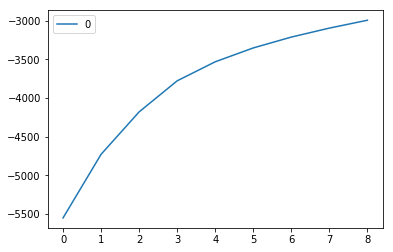

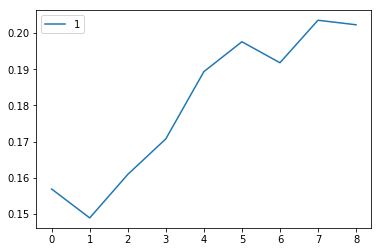

In [218]:
pd.DataFrame(clusters_scores)[[0]].plot(),
pd.DataFrame(clusters_scores)[[1]].plot()

In [219]:
clusters_scores

[(-5549.707769680422, 0.15690609169658593, 10),
 (-4726.982997161291, 0.14892753915444465, 20),
 (-4178.376460294012, 0.16093505679113376, 30),
 (-3776.714515284609, 0.1707563570005523, 40),
 (-3530.5054627187096, 0.1893317556358193, 50),
 (-3351.409327225314, 0.19759408407702203, 60),
 (-3211.0932437415104, 0.19179453714473466, 70),
 (-3094.957946801408, 0.20353422046244354, 80),
 (-2993.3331863945573, 0.20228456887642296, 90)]

In [100]:
clustering.score(X_new_lda)

-592.9953714344127

In [102]:
clustering.score(X_new_lda)

-563.2322182364401

In [221]:
comp = pd.DataFrame(new_data[['text', 'prediction']])

In [222]:
comp['clusters'] = clustering.predict(X_new_lda)

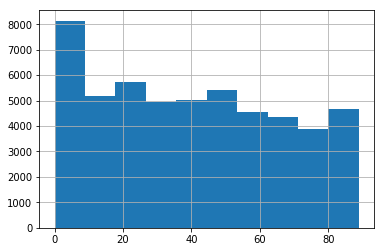

In [223]:
comp['clusters'].hist()

In [224]:
r = pd.pivot_table(comp, index='prediction', columns='clusters', aggfunc=len, fill_value=0)\
            .style.background_gradient(axis=1)

In [225]:
r

In [74]:
new_data['cluster'] = clustering.predict(X_new_lda)

In [247]:
new_data.prediction.unique()

array(['sleep', 'social', 'agree', 'pain', 'drugAddiction', 'infoPatient',
       'eatingDisorders', 'treatment', 'positiveEmo', 'risk', 'bye',
       'pathology', 'disagree', 'activity', 'alcohol', 'hello',
       'incomprehension', 'fallback', 'smoking', 'negativeEmo'],
      dtype=object)

In [99]:
new_data[new_data.prediction == 'fallback']\
    .sort_values('proba', ascending=False)[['text', 'proba', 'clean_text', 'cluster']]

,text,proba,clean_text,cluster
65740,do u still experience pain and discomfort ? ?,0.175928,"[u, still, experience, pain, discomfort]",59
19507,What is the treatment for hyponatremia or related illness / disorder and \n\n 3 .,0.152941,"[treatment, hyponatremia, related, illness, disorder, _num_]",6
46093,There has not been a single day where my upper left chest did not experience pain .,0.149148,"[single, day, upper, left, chest, experience, pain]",24
62770,I hope pain meds will help .,0.145308,"[hope, pain, meds, help]",27
87678,I felt this way the following day as well .,0.138791,"[felt, way, following, day, well]",65
100865,glasses of water per day .,0.138719,"[glasses, water, per, day]",65
88535,\n\n But could an allergy hurt this bad ?,0.131511,"[could, allergy, hurt, bad]",24
65866,She could even be allergic to something .,0.130986,"[could, even, allergic, something]",24
27765,\n Hi there is something going around but sometimes it can be averted .,0.126070,"[hi, something, going, around, sometimes, averted]",28
10150,My cholesterol was at 6.9 & sugar 4 .,0.123886,"[cholesterol, _num_, sugar, _num_]",22


In [253]:
new_data[new_data.cluster == 5]\
    .sort_values('proba', ascending=False)[['text', 'proba', 'clean_text', 'cluster', 'prediction']]

,text,proba,clean_text,cluster,prediction
3332,in the mean time may also help .,0.438399,"[mean, time, may, also, help]",5,alcohol
12224,Cravings have been gone for many yrs and I weigh less than I ever have .,0.410292,"[cravings, gone, many, yrs, weigh, less, ever]",5,eatingDisorders
9015,"I can not stop on my own will , I 've tried so many times , and I always get thirsty .",0.385345,"[stop, tried, many, times, always, get, thirsty]",5,bye
6577,20 min of sun a day increases the Vit .,0.364632,"[_num_, min, sun, day, increases, vit]",5,bye
19204,"If he passes your first 3 tests , do n’t stop there .",0.364632,"[passes, first, _num_, tests, nt, stop]",5,bye
21340,The first 3 or 4 days are the worst .,0.364632,"[first, _num_, _num_, days, worst]",5,bye
4911,"HELP , we are at wit 's end after 3 months .",0.364631,"[help, wit, end, _num_, months]",5,bye
21746,I have always been a Type A personality and that does n't help .,0.361386,"[always, type, personality, nt, help]",5,bye
6732,"\n\n Just be kind to yourself stop beating yourself up , and I am proud of you standing up for yourself with that tommy person .",0.359072,"[kind, stop, beating, proud, standing, tommy, person]",5,bye
27964,I get the vegetarian burrito bowl .,0.345264,"[get, vegetarian, burrito, bowl]",5,bye


In [ ]:
new_data[new_data.proba>0.6][new_data.cluster == 22].groupby('prediction').mean()['proba'].sort_values(ascending=False)

In [ ]:
new_data[new_data.proba>0.2].groupby(['cluster', 'prediction']).sum()

In [ ]:
new_data[new_data.proba>0.2].groupby(['cluster', 'prediction']).count()['proba']#.sort_values(ascending=False)

In [291]:
new_data[new_data.proba>0.6].groupby(['cluster', 'prediction']).count()['proba']#.plot(kind='box')

cluster  prediction     
0        infoPatient          1
3        pain               104
10       sleep                1
13       infoPatient          1
14       infoPatient          5
15       treatment          157
30       alcohol              9
33       sleep                2
36       infoPatient         23
38       sleep              124
42       treatment            1
45       sleep               16
49       smoking             88
56       treatment          127
59       sleep                3
68       sleep               12
70       sleep                1
76       eatingDisorders     32
81       sleep                3
Name: proba, dtype: int64

In [89]:
new_data.to_csv('full_general_health.tsv', sep='\t')

In [77]:
def filter_data(new_data, proba_threshold, population_threshold=None):
    by_proba = new_data[new_data.proba>proba_threshold]
    del by_proba['bow']
    del by_proba['lda_features']
    population = by_proba.groupby(['cluster', 'prediction']).count()['proba']
    if not population_threshold:
        population_threshold = int(population.mean())
    print(population_threshold)
    population = population.reset_index().groupby('cluster').max()
    clusters_to_leave = population[population.proba>population_threshold].index
    by_population = by_proba[by_proba.cluster.isin(clusters_to_leave)]
    
    new_labels = {}
    res = pd.DataFrame()
    
    for cluster_num in clusters_to_leave:
        new_labels[cluster_num] = by_population[by_population.cluster==cluster_num].groupby('prediction')\
            .sum()['proba'].sort_values().index[-1]
    
    by_population.loc[:, 'intent'] = by_population.loc[:, ('cluster')].apply(lambda x: new_labels[x])
    res = by_population.sort_values(['intent', 'proba'], ascending=False).groupby('intent').head(population_threshold)
    return res
    

In [104]:
res = filter_data(new_data, 0.005)

89


In [129]:
res.groupby('intent').mean()['proba']

intent
activity           0.412002
agree              0.331701
alcohol            0.550136
bye                0.277958
disagree           0.206950
drugAddiction      0.354666
eatingDisorders    0.690519
hello              0.212172
incomprehension    0.281659
infoPatient        0.671066
negativeEmo        0.348236
pain               0.804245
pathology          0.283129
positiveEmo        0.404091
sleep              0.419246
smoking            0.497321
social             0.377437
treatment          0.712752
Name: proba, dtype: float64

In [200]:
res.groupby('intent').head(3)

,clean_text,text,lens,prediction,proba,cluster,intent
49146,"[take, _num_, mg, _num_, mg, bedtime, depending]",The I take from .5 mg to 2 mg at bedtime depending on how I am doing .,3,treatment,0.855511,20,treatment
62299,"[take, coq_num_, take, _num_, _num_, mg]","\n\n I do take CoQ10 , I take the 150 and 1,000 mg .",3,treatment,0.855511,20,treatment
49765,"[celexa, _num_, mg, seroquel, _num_, mg]",\n She is on Celexa 30 mg and Seroquel 25 mg .,2,treatment,0.829631,20,treatment
40113,"[started, around, age, _num_]",This all started around age 14 .,3,social,0.518857,46,social
771,"[age, _num_, begun, breathing, problems]","\n\n Now , at age 20 , I have begun having breathing problems .",2,social,0.441788,46,social
3691,"[women, start, feeling, peri, symptoms, _num_]",Some women do start feeling peri symptoms at 30 .,2,social,0.441788,46,social
53366,"[brothers, _num_, _num_, _num_, _num_, _num_, _num_]",Both my brothers are 5 - 10 to 5 - 11 and I 'm only 5 - 6 .,1,smoking,0.549865,22,smoking
6527,"[spells, usually, last, _num_, _num_, minutes]",such spells usually last 20 - 30 minutes .,3,smoking,0.539167,22,smoking
43462,"[gained, _num_, pounds, last, _num_, _num_, years]",I have gained 38 pounds in the last 3 or 4 years .,2,smoking,0.538924,22,smoking
99955,"[takes, really, good, doctor, get, diagnosed]",\n\n It takes a really good doctor to get you diagnosed .,4,sleep,0.498349,50,sleep


Expand!

In [91]:
data = data.append(res[['clean_text', 'text', 'intent']])

/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [108]:
missing_classes = new_data[new_data.prediction == 'fallback'].sort_values('proba', ascending=False).head(89)
missing_cladata = data.append(res[['clean_text', 'text', 'intent']])sses['intent'] = missing_classes['prediction']

In [109]:
data = data.append(missing_classes[['clean_text', 'text', 'intent']])

/home/alice/Mines/paradec/paradec/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


http://localhost:8888/notebooks/selecting%20lda.ipynb#Quick-easy-classifier

In [329]:
res[res.cluster==6].groupby('prediction').count()['cluster'] / len(res[res.cluster==6])

prediction
alcohol            0.166667
drugAddiction      0.020833
eatingDisorders    0.020833
infoPatient        0.020833
pain               0.458333
sleep              0.187500
smoking            0.083333
treatment          0.041667
Name: cluster, dtype: float64

In [431]:
res.groupby('intent').count()

,clean_text,text,prediction,proba,cluster
intent,,,,,
alcohol,30,30,30,30,30
bye,30,30,30,30,30
eatingDisorders,30,30,30,30,30
infoPatient,30,30,30,30,30
pain,30,30,30,30,30
risk,30,30,30,30,30
sleep,30,30,30,30,30
smoking,30,30,30,30,30
treatment,30,30,30,30,30


In [84]:
filter_data(new_data, 0.05).groupby('intent').count()

89


,clean_text,text,lens,prediction,proba,cluster
intent,,,,,,
activity,89,89,89,89,89,89
agree,89,89,89,89,89,89
alcohol,89,89,89,89,89,89
bye,89,89,89,89,89,89
disagree,89,89,89,89,89,89
drugAddiction,89,89,89,89,89,89
eatingDisorders,89,89,89,89,89,89
hello,89,89,89,89,89,89
incomprehension,89,89,89,89,89,89


In [199]:
res

,clean_text,text,lens,prediction,proba,cluster,intent
49146,"[take, _num_, mg, _num_, mg, bedtime, depending]",The I take from .5 mg to 2 mg at bedtime depending on how I am doing .,3,treatment,0.855511,20,treatment
62299,"[take, coq_num_, take, _num_, _num_, mg]","\n\n I do take CoQ10 , I take the 150 and 1,000 mg .",3,treatment,0.855511,20,treatment
49765,"[celexa, _num_, mg, seroquel, _num_, mg]",\n She is on Celexa 30 mg and Seroquel 25 mg .,2,treatment,0.829631,20,treatment
63348,"[_num_, mg, _num_, mg]",40 mg or 80 mg ?,2,treatment,0.829631,20,treatment
30333,"[prescribed, azithromycin, _num_, mg, take, _num_, days]",She prescribed me some Azithromycin 250 mg to take for 5 days .,3,treatment,0.829631,20,treatment
45149,"[tried, _num_, mg, _num_, mg]",I tried 15 mg and 20 mg .,2,treatment,0.829626,20,treatment
39086,"[take, care, _num_, mg, coenzyme, _num_]",\n\n Take care \n\n 300 mg of Coenzyme 10 ?,3,treatment,0.829614,20,treatment
7220,"[hydrozyz, hcl, _num_, mg, amitriptilane, _num_, mg]",Now he has me on HYDROZYZ HCL 25 mg and AMITRIPTILANE 10 mg .,2,treatment,0.829413,20,treatment
59481,"[take, _num_, _num_, mg, lisinopril]",\n Why did you take 26 20 mg lisinopril ?,4,treatment,0.817042,20,treatment
18518,"[take, _num_, mg, amlodipine]",I just take the 5 mg amlodipine .,3,treatment,0.783296,20,treatment
